<a href="https://colab.research.google.com/github/valliansayoga/python-projects/blob/main/umich_theses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of University of Michigan theses trend

[Dataset](https://bit.ly/umich-theses-2021), analysis, and visualisation by Vallian Sayoga

Analysis was done by counting the values for each column because all of the column data types are 'Object' with no numerical value.

Analysis and visualisation show that:
1. There are fewer peer reviewed papers
2. Other languages dominate than EN (US)
3. Three most common paper types are 

> Archival material

> Thesis

> Project

4. In 2021, there are more master and PhD students submitting their paper
5. Most commont research subject is Health Science (makes sense since the pandemic happening)
6. The most active period for thesis submission in 2021 are in April and May (excluding Other since it has no month)

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme()

In [24]:
df = pd.read_csv('https://bit.ly/umich-theses-2021', parse_dates=True)

# Data cleaning

In [25]:
df.head()

,author,url_identifier,type,subject,campus,date_issued,language,title,department,peerreviewed
0,"Stockton, Ronald R.",https://hdl.handle.net/2027.42/171089,Presentation,Social Sciences,Dearborn,2021-12-27,en_US,"Archbishop Desmond Tutu, a Moral Giant. Text ...","Social Sciences: Political Science, Department...",NaN
1,"Stockton, Ronald R.",https://hdl.handle.net/2027.42/171090,Presentation,Political Science,Dearborn,2021-12-27,en_US,"Will Roe Survive? The MIssissippi Challenge, ...","Social Sciences: Political Science, Department...",NaN
2,"Wilkinson, Bruce H.",https://hdl.handle.net/2027.42/171083,Article,Science,Ann Arbor,2021-12-23,en_US,Dimensions of Sedimentary Lithotopes and Taxon...,"Zoology, University of Michigan Museum of (UMMZ)",Peer Reviewed
3,"Robinson-Lane, Sheria",https://hdl.handle.net/2027.42/171081,Book chapter,Health Sciences,Ann Arbor,2021-12-22,en_US,"“Ooh, You Got to Holler Sometime” Pain Meaning...","Nursing, School of",NaN
4,"De Geronimo, Francesca",https://hdl.handle.net/2027.42/171080,Other,Health Sciences,Ann Arbor,2021-12-21,en_US,Peer Group Therapy for Adolescent Substance Mi...,"Nursing, School of",NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   author          2024 non-null   object
 1   url_identifier  2024 non-null   object
 2   type            2024 non-null   object
 3   subject         686 non-null    object
 4   campus          460 non-null    object
 5   date_issued     2024 non-null   object
 6   language        636 non-null    object
 7   title           2024 non-null   object
 8   department      2024 non-null   object
 9   peerreviewed    74 non-null     object
dtypes: object(10)
memory usage: 158.2+ KB


In [27]:
df.describe()

,author,url_identifier,type,subject,campus,date_issued,language,title,department,peerreviewed
count,2024,2024,2024,686,460,2024,636,2024,2024,74
unique,907,2024,20,17,3,165,1,1768,132,1
top,"University of Michigan. College of Literature,...",https://hdl.handle.net/2027.42/169181,Archival Material,Health Sciences,Ann Arbor,2021,en_US,Supporting documents,Dissertations and Theses (Ph.D. and Master's),Peer Reviewed
freq,269,1,1117,248,428,1428,636,29,425,74


In [28]:
df.isna().sum()

author               0
url_identifier       0
type                 0
subject           1338
campus            1564
date_issued          0
language          1388
title                0
department           0
peerreviewed      1950
dtype: int64

In [29]:
df['subject'] = df.subject.fillna('Other')
df['campus'] = df.campus.fillna('Other')
df['language'] = df.language.fillna('Other')
df['peerreviewed'] = df.peerreviewed.fillna('No')
df['date_issued'] = pd.to_datetime(df.date_issued)

In [30]:
df.isna().sum()

author            0
url_identifier    0
type              0
subject           0
campus            0
date_issued       0
language          0
title             0
department        0
peerreviewed      0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   author          2024 non-null   object        
 1   url_identifier  2024 non-null   object        
 2   type            2024 non-null   object        
 3   subject         2024 non-null   object        
 4   campus          2024 non-null   object        
 5   date_issued     2024 non-null   datetime64[ns]
 6   language        2024 non-null   object        
 7   title           2024 non-null   object        
 8   department      2024 non-null   object        
 9   peerreviewed    2024 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 158.2+ KB


In [34]:
df.subject.value_counts()

Other                                    1338
Health Sciences                           248
Engineering                               122
Social Sciences                           107
Science                                    97
Business and Economics                     28
Humanities                                 23
Social Science                             23
Arts                                       14
Political Science                          11
Industrial and Operations Engineering       4
Industrial and Systems Engineering          3
Computer Engineering                        1
Criminology and Criminal Justice            1
Natural Resources and Environment           1
Energy                                      1
Computer Science                            1
Electrical Engineering                      1
Name: subject, dtype: int64

### Changing Social Science -> Social Sciences

In [39]:
df.subject.replace({"Social Science":"Social Sciences"}, inplace=True)

In [40]:
df.subject.value_counts()

Other                                    1338
Health Sciences                           248
Social Sciences                           130
Engineering                               122
Science                                    97
Business and Economics                     28
Humanities                                 23
Arts                                       14
Political Science                          11
Industrial and Operations Engineering       4
Industrial and Systems Engineering          3
Electrical Engineering                      1
Criminology and Criminal Justice            1
Natural Resources and Environment           1
Energy                                      1
Computer Science                            1
Computer Engineering                        1
Name: subject, dtype: int64

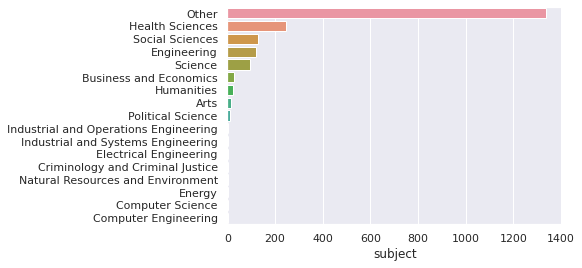

In [41]:
sns.barplot(y=df.subject.value_counts().index, x=df.subject.value_counts())

### Changing peerreviewed -> Yes

In [42]:
df.peerreviewed.value_counts()

No               1950
Peer Reviewed      74
Name: peerreviewed, dtype: int64

In [45]:
df.peerreviewed.replace({"Peer Reviewed":"Yes"}, inplace=True)

In [46]:
df.peerreviewed.value_counts()

No     1950
Yes      74
Name: peerreviewed, dtype: int64

### Checking Type

In [47]:
df['type'].value_counts()

Archival Material    1117
Thesis                466
Project               198
Article                71
Preprint               35
Other                  33
Presentation           21
Conference Paper       21
Practicum              16
Technical Report       12
Book chapter            7
Working Paper           6
Poster                  5
Book                    4
Plan or blueprint       3
Video                   3
Dataset                 2
Learning Object         2
Software                1
Map                     1
Name: type, dtype: int64

### Checking Campus

In [48]:
df.campus.value_counts()

Other        1564
Ann Arbor     428
Dearborn       31
Flint           1
Name: campus, dtype: int64

# Cleaned dataset

In [49]:
df.to_csv("umich-theses-2021-cleaned", index=False)

# Data visualisation

Text(0.5, 0, 'Counts')

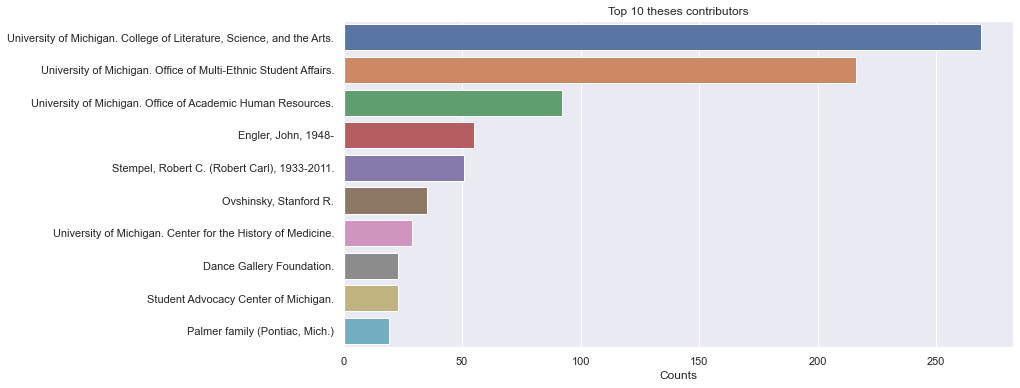

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Top 10 theses contributors')
sns.barplot(y=df.author.value_counts()[0:10].index, x=df.author.value_counts()[0:10])
plt.xlabel('Counts')

Text(0.5, 0, 'Counts')

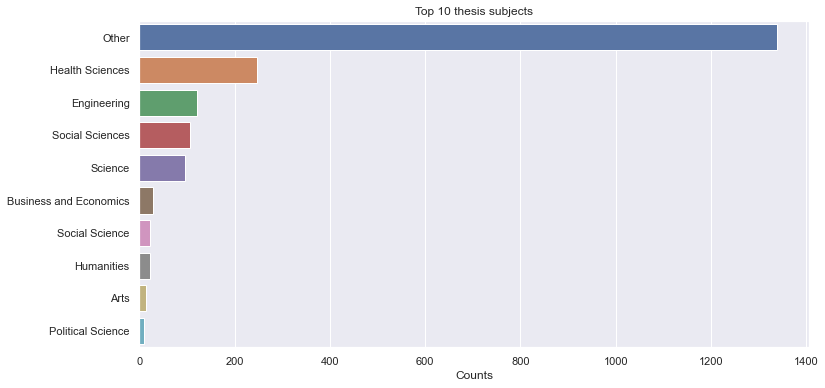

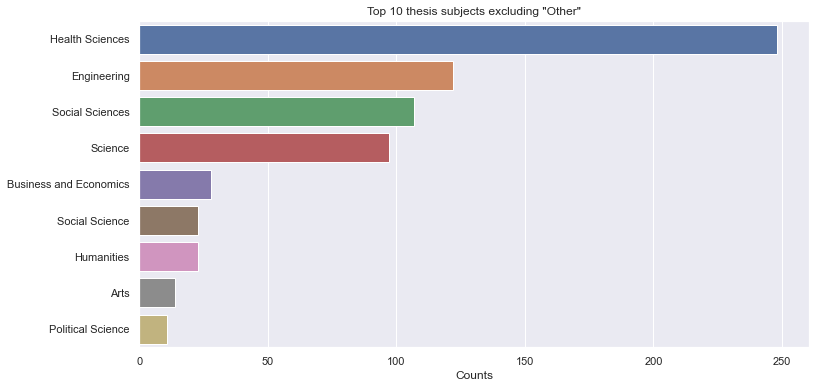

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Top 10 thesis subjects')
sns.barplot(y=df.subject.value_counts()[0:10].index, x=df.subject.value_counts()[0:10])
plt.xlabel('Counts')

plt.figure(figsize=(12,6))
plt.title('Top 10 thesis subjects excluding "Other"')
sns.barplot(y=df.subject.value_counts()[1:10].index, x=df.subject.value_counts()[1:10])
plt.xlabel('Counts')

<AxesSubplot:title={'center':'2021 theses timeline excluding "Other"'}, xlabel='date_issued', ylabel='title'>

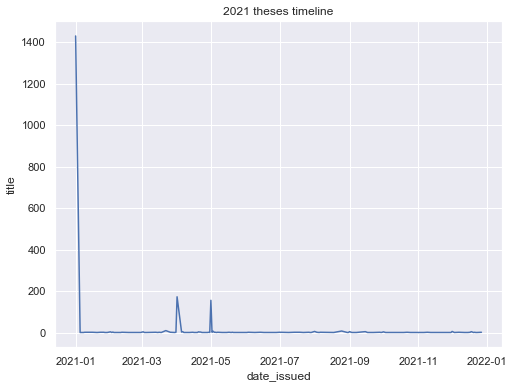

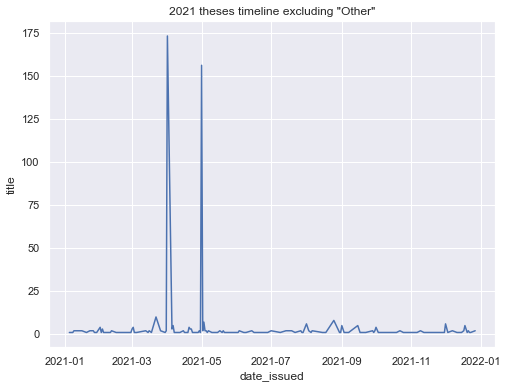

In [ ]:
plt.figure(figsize=(8,6))
plt.title('2021 theses timeline')
sns.lineplot(x=df.groupby('date_issued').title.count().index, y=df.groupby('date_issued').title.count())
# df.groupby('date_issued').author.count()

plt.figure(figsize=(8,6))
plt.title('2021 theses timeline excluding "Other"')
sns.lineplot(x=df.groupby('date_issued').title.count()[1:].index, y=df.groupby('date_issued').title.count()[1:])

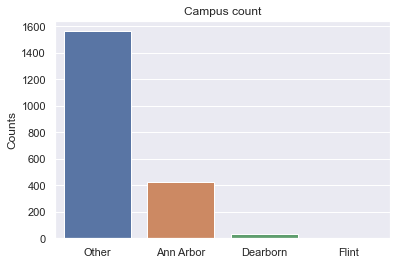

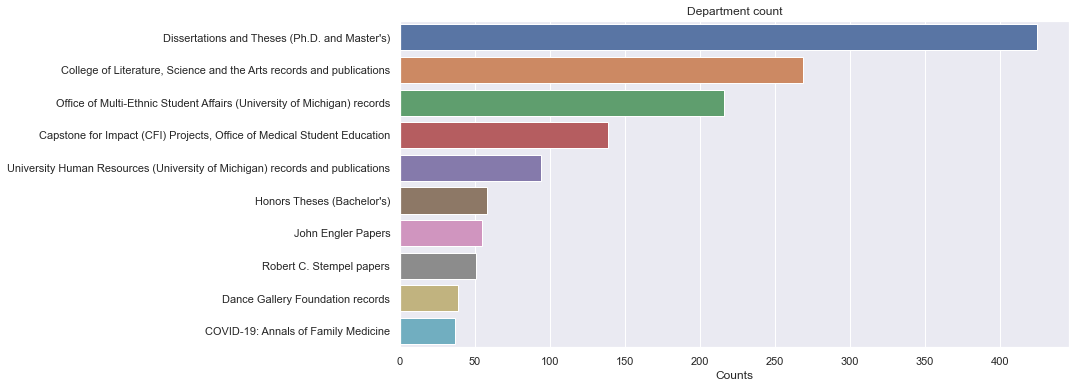

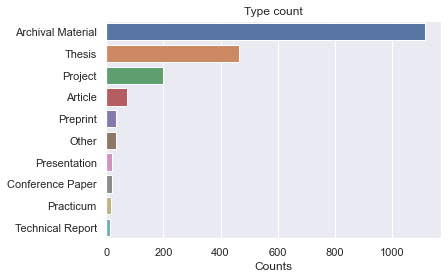

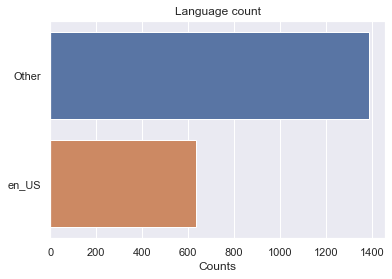

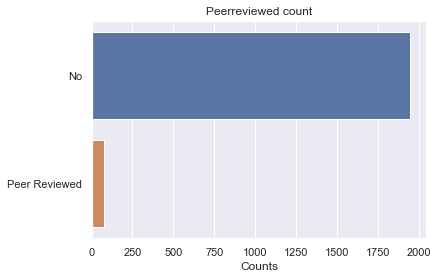

In [ ]:
plt.title('Campus count')
sns.barplot(x=df.campus.value_counts().index, y=df.campus.value_counts())
plt.ylabel('Counts')
plt.show()

plt.figure(figsize=(12,6))
plt.title('Department count')
sns.barplot(y=df.department.value_counts()[:10].index, x=df.department.value_counts()[:10])
plt.ylabel('')
plt.xlabel('Counts')
plt.show()

# plt.figure(figsize=(12,6))
plt.title('Type count')
sns.barplot(y=df.type.value_counts()[:10].index, x=df.type.value_counts()[:10])
plt.ylabel('')
plt.xlabel('Counts')
plt.show()

plt.title('Language count')
sns.barplot(y=df.language.value_counts()[:10].index, x=df.language.value_counts()[:10])
plt.ylabel('')
plt.xlabel('Counts')
plt.show()

plt.title('Peerreviewed count')
sns.barplot(y=df.peerreviewed.value_counts()[:10].index, x=df.peerreviewed.value_counts()[:10])
plt.ylabel('')
plt.xlabel('Counts')
plt.show()